In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [20]:
train_run_ids = ["1652875851.3497071", "1652875901.3107166", "1652876013.741493", "1652876206.2541456",
                     "1652876485.8123376", "1652959186.4507334", "1652959347.972946", "1653042695.4914637",
                     "1653042775.5213027", "1653043202.5073502"]
vaild_run_ids = ["1653043345.3415065",
                     "1653043428.8546412", "1653043549.5187616"]

In [21]:
# read train data as below, but add runid columnt for each entry

train_data = pd.concat([pd.read_csv(os.path.join(r"C:\polibuda\sem6\ROB\RoboticsII-Jetbot\dataset", f"{run_id}.csv"), names=["image_id", "forward", "left"]) for run_id in train_run_ids])
# add runid column
train_data["run_id"] = np.concatenate([[run_id]*len(pd.read_csv(os.path.join(r"C:\polibuda\sem6\ROB\RoboticsII-Jetbot\dataset", f"{run_id}.csv"), names=["image_id", "forward", "left"])) for run_id in train_run_ids])

valid_data = pd.concat([pd.read_csv(os.path.join(r"C:\polibuda\sem6\ROB\RoboticsII-Jetbot\dataset", f"{run_id}.csv"), names=["image_id", "forward", "left"]) for run_id in vaild_run_ids])
# add runid column
valid_data["run_id"] = np.concatenate([[run_id]*len(pd.read_csv(os.path.join(r"C:\polibuda\sem6\ROB\RoboticsII-Jetbot\dataset", f"{run_id}.csv"), names=["image_id", "forward", "left"])) for run_id in vaild_run_ids])

In [22]:
train_data.head()

,image_id,forward,left,run_id
0,24,0.039062,0.0,1652875851.3497071
1,25,0.210938,0.0,1652875851.3497071
2,26,0.390625,0.0,1652875851.3497071
3,27,0.421875,0.0,1652875851.3497071
4,28,0.421875,0.0,1652875851.3497071


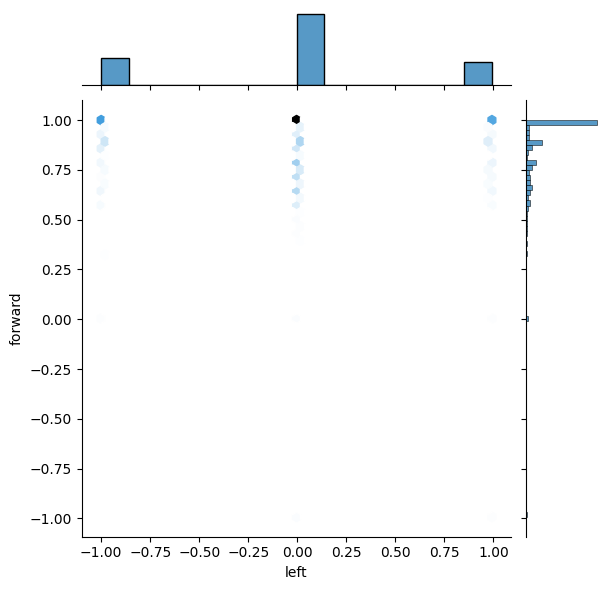

In [23]:
# corealtion between forward and left
sns.jointplot(x=train_data["left"], y=train_data["forward"], kind='hex')

In [24]:
# how many forward < 0
train_data[train_data["forward"] < 0].shape[0]

37

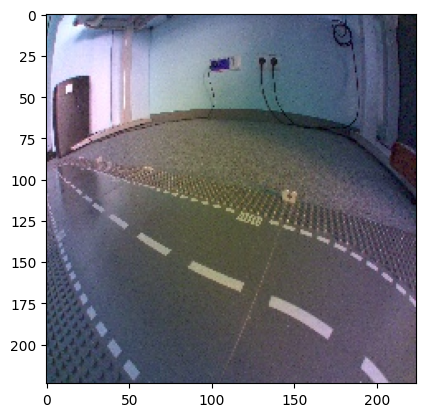

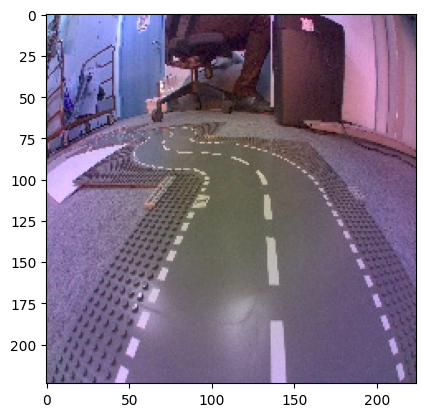

In [25]:
import cv2
import random
# iterate over whole train_data[train_data["forward"] < 0] and show images
for index, row in train_data[train_data["forward"] < 0].iterrows():
    if random.random() < 0.05:
        img = cv2.imread(os.path.join(r"C:\polibuda\sem6\ROB\RoboticsII-Jetbot\dataset", str(row["run_id"]), f"{row['image_id']:04d}.jpg"))
        plt.imshow(img) 
        plt.show()
    

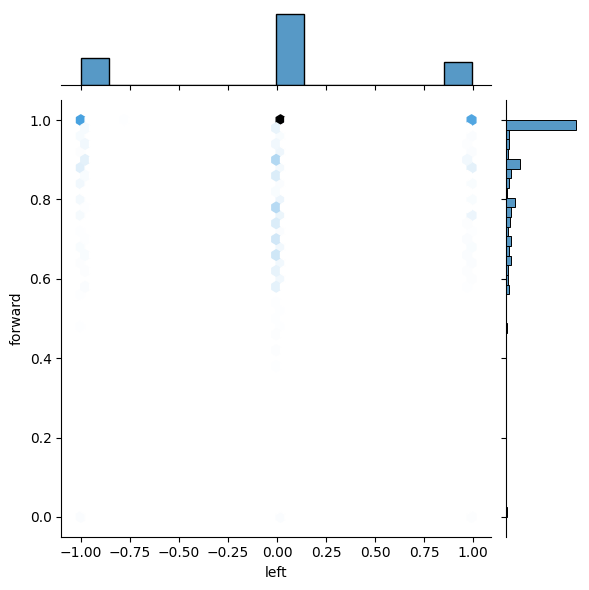

In [26]:
# delete all rows with forward < 0
train_data = train_data[train_data["forward"] >= 0]
#corr between forward and left
sns.jointplot(x=train_data["left"], y=train_data["forward"], kind='hex')

In [27]:
# create random forest regressor to predict forward
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = train_data["left"].values.reshape(-1, 1)
y = train_data["forward"].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

mean_squared_error(y_test, y_pred)

C:\Users\Dell\AppData\Local\Temp\ipykernel_50836\3163681894.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


0.027869906325892136

In [28]:
# predict forward for left = 0.9
regr.predict([[0.9]])

array([0.88095531])

In [29]:
# regr stats
regr.score(X_test, y_test)


0.014378276952827118

In [30]:
# how many different left values
train_data["left"].unique().shape[0]

142

In [31]:
train_data.shape[0]

6272

In [32]:
# linera regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = train_data["left"].values.reshape(-1, 1)
y = train_data["forward"].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regr = LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

mean_squared_error(y_test, y_pred)

0.02830397416515044

In [33]:
# print coef and intercept
print(regr.coef_)
print(regr.intercept_)

[[-0.00288025]]
[0.8688445]


In [38]:
# group left values by -1 -0.5 0 0.5 1
train_data[train_data["left"] > 0.5].shape[0]


1182

In [39]:
train_data[train_data["left"] < -0.5].shape[0]

1422

In [42]:
train_data[(train_data["left"] > -0.5) & (train_data["left"] < 0.5)].shape[0]

3667

Twice as much data!

`After experiments` - deleting 50% of data makes the model worse. So, we will use all data.